**Cohort analysis**

Cohort analysis involves dividing users into distinct groups, or cohorts, based on certain criteria. In this case study, these cohorts are defined by the time of user acquisition. By grouping users together based on time of acquisition, we can study how different cohorts behave in terms of engagement and retention.

For example, you might create cohorts based on the month users first signed up for your service. You can then track how each cohort's activity, such as their conversion rate or lifetime value, evolves over time. This approach allows you to identify trends, anomalies, and areas where you may need to make adjustments to improve user retention and satisfaction.

**Retention Rate Time-Based Cohort Analysis:**

Retention rate time-based cohort analysis is a specialized form of cohort analysis that focuses on the retention of users over multiple time periods.

To perform retention rate time-based cohort analysis, you would typically:

- Create cohorts based on user acquisition dates.

- Measure the percentage of users from each cohort who continue to engage with your product or service over time (e.g., after 1 month, 3 months, etc.).

- Analyze how retention rates vary across different cohorts and time periods, enabling you to identify trends and make data-driven decisions.

This analysis can reveal whether certain cohorts have better or worse retention rates, helping the business understand the factors contributing to user retention or attrition. It can also assist in optimizing marketing, product development, and customer support strategies.

# Import libraries

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.ticker import FuncFormatter

# Load and prepare dataset

In [53]:
# Load daatset

data = pd.read_csv("dataset_ecommerce.csv")
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [54]:
data.describe(include ="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [56]:
data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [57]:
# Drop missing columm
data.dropna(inplace = True)

#we can only track the activities of customers that are known (those with customerID)

In [58]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

# Exploratory data analysis

## Analysis by country

**Bivariate analysis of countries and total number of purchase**

In [59]:
quantity_per_country = data.groupby(["Country"])["Quantity"].sum().reset_index()
quantity_per_country = quantity_per_country.sort_values("Quantity", ascending = False).reset_index()

In [60]:
quantity_per_country.head(3)

,index,Country,Quantity
0,23,Togo,741223
1,20,South Africa,740589
2,4,Cote d'Ivoire,740229


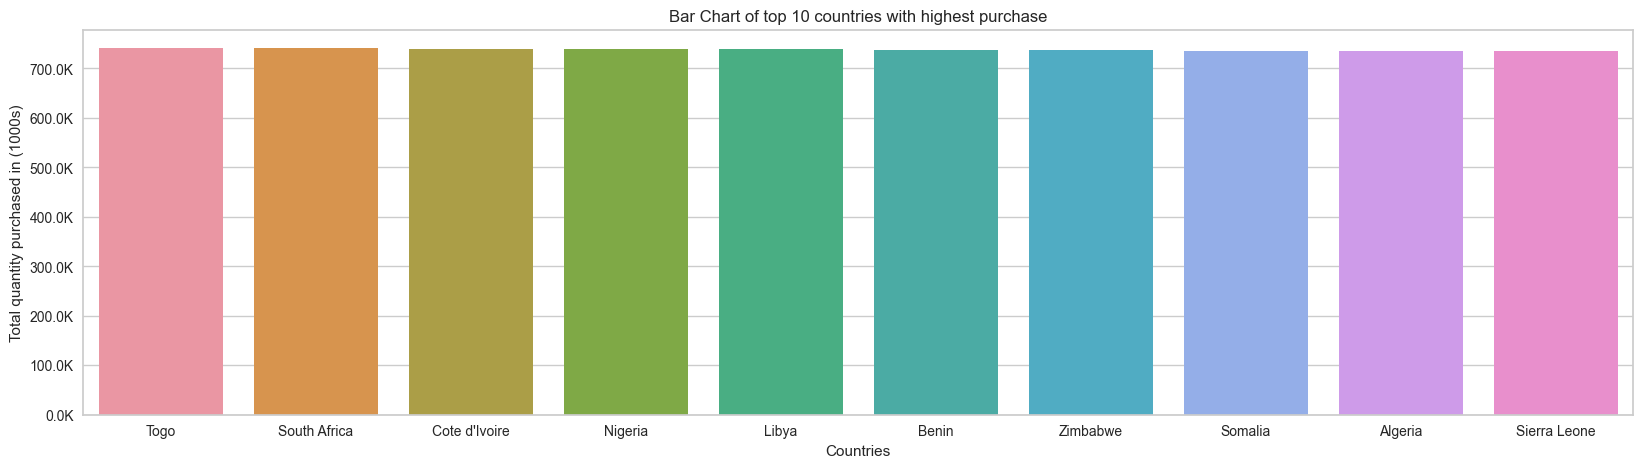

In [61]:
# Draw a plot of top 10 countries with highest number of quantity purchase
top_10_countries = quantity_per_country.head(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data= top_10_countries)
ax.yaxis.set_major_formatter(y_format)

plt.xlabel('Countries')
plt.ylabel('Total quantity purchased in (1000s)')
plt.title('Bar Chart of top 10 countries with highest purchase')
plt.show()

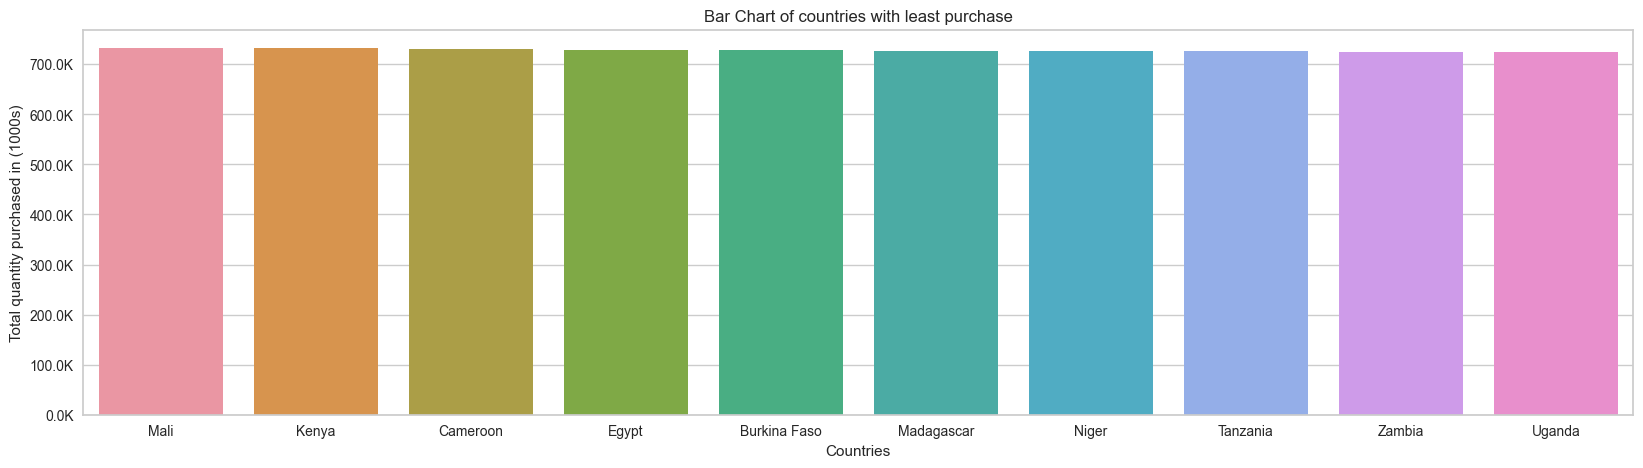

In [62]:
# Draw a plot of 10 countries with least number of quantity purchase
least_10_countries = quantity_per_country.tail(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

y_format = FuncFormatter(lambda x, _: f'{x / 1000:.1f}K')
ax = sns.barplot(x='Country', y='Quantity', data= least_10_countries)
ax.yaxis.set_major_formatter(y_format)

plt.xlabel('Countries')
plt.ylabel('Total quantity purchased in (1000s)')
plt.title('Bar Chart of countries with least purchase')
plt.show()

**Bivariate analysis of countries and number of customers**

In [63]:
country_to_customers = data.groupby(["Country"])["CustomerID"].nunique().reset_index()
country_to_customers = country_to_customers.sort_values("CustomerID", ascending = False).reset_index()
country_to_customers.rename(columns = {"CustomerID" : "Number of customers"}, inplace = True)

In [64]:
country_to_customers.head(3)

,index,Country,Number of customers
0,13,Mozambique,3072
1,1,Benin,3054
2,23,Togo,3053


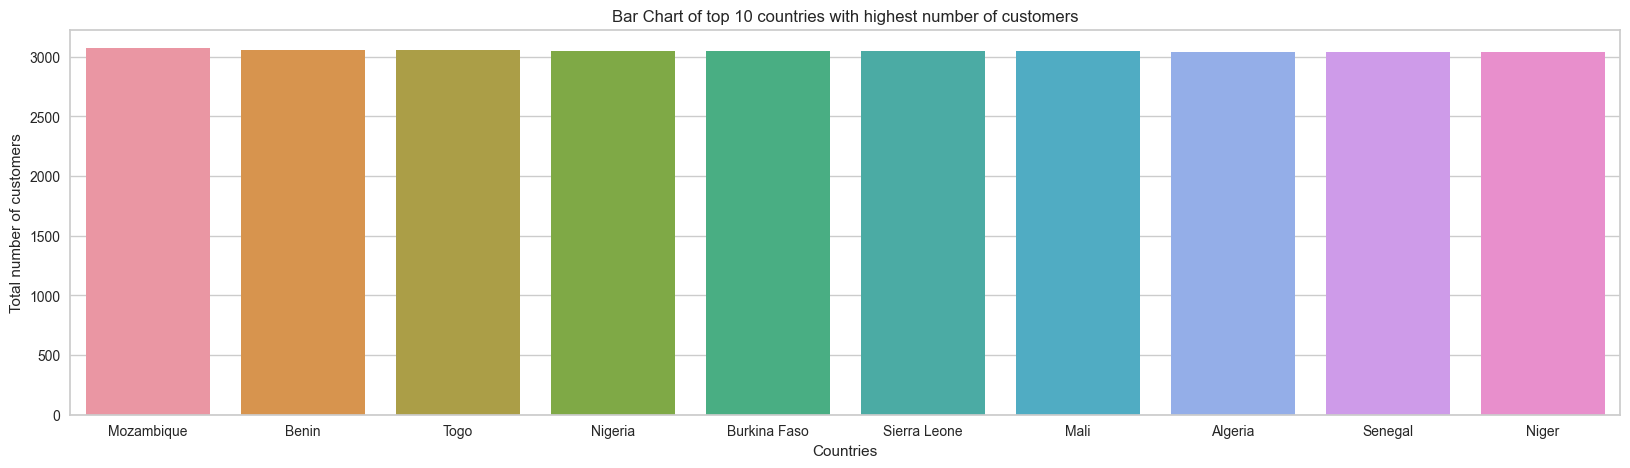

In [65]:
# Draw a plot of top 10 countries with highest number of customers (unique customerID)
top_countries_to_customers = country_to_customers.head(10)

# Create a bar chart from the selected data
plt.figure(figsize=(20, 5))

sns.barplot(x='Country', y='Number of customers', data= top_countries_to_customers)

plt.xlabel('Countries')
plt.ylabel('Total number of customers')
plt.title('Bar Chart of top 10 countries with highest number of customers')
plt.show()

## Sales trend

In [66]:
# Group the data by month and calculate the total monthly sales
monthly_sales = data.groupby(data['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()

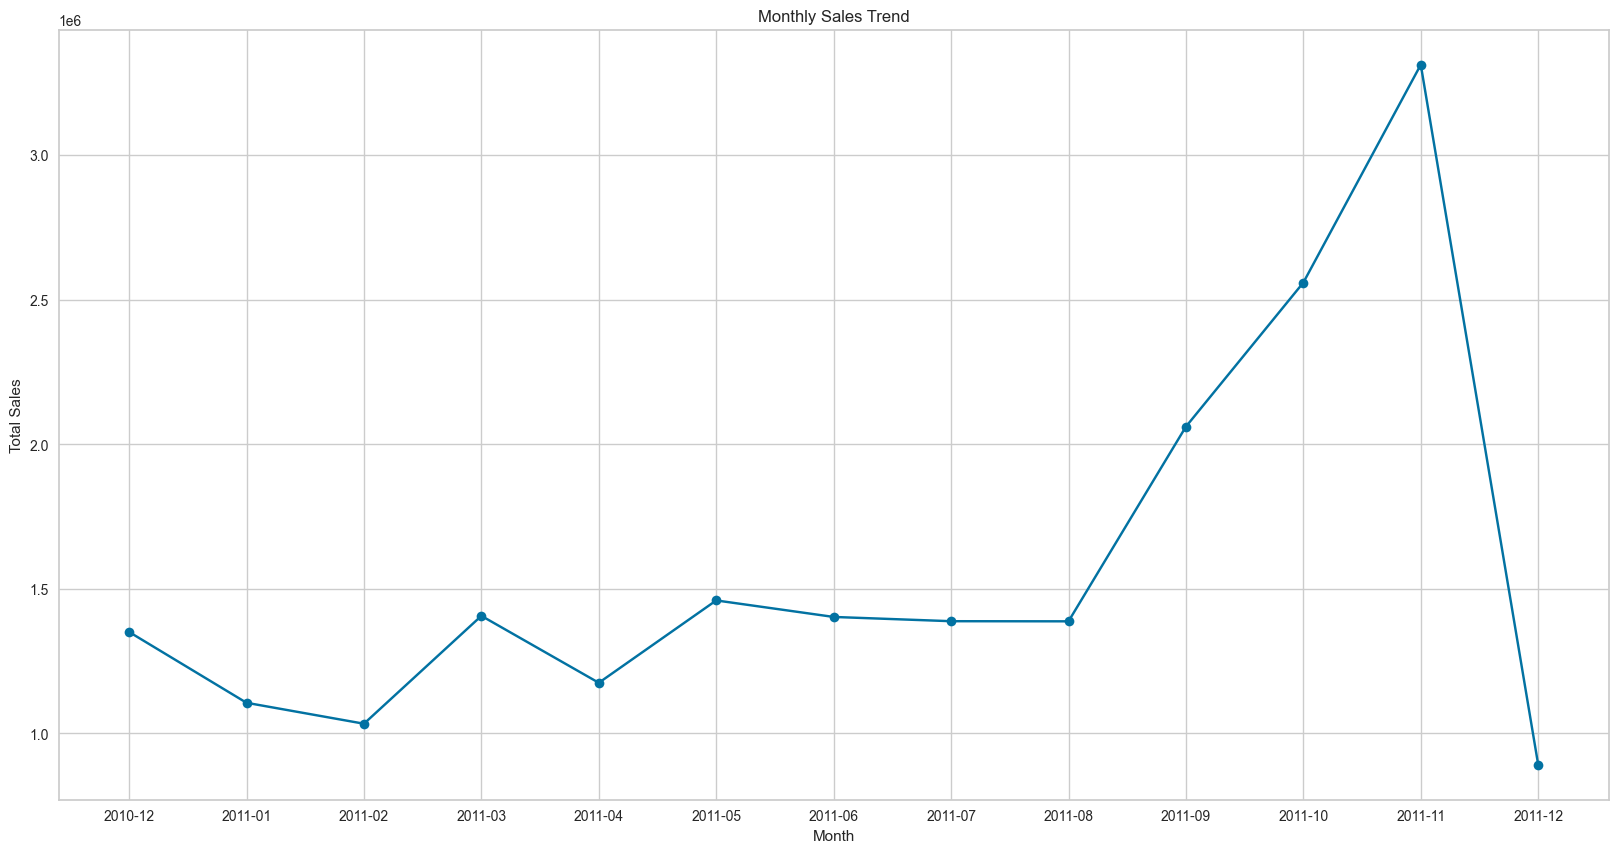

In [67]:
# Create a line chart
plt.figure(figsize=(20, 10))
plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.grid(True)

# Display the plot
plt.show()


**Observations**

- December 2010 to August 2011: Noticeable fluctuations in sales quantity.
- August 2011 to November 2011: A significant sales increase occurred.
- November 2011 to December 2011: Sales experienced a sudden and substantial decline.

# Cohort Analysis

## create cohort date

Since we are carrying out a Time-based cohort analysis, the cohorts will be grouped according to the dates they made their first purchase

and Retention rate will be calculated by analysis the months they stayed active after their first purchase

In [68]:
#create Invoice month as new feature
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [69]:
data["InvoiceDate"]  = data["InvoiceDate"].apply(get_month)
data.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal
541908,581587,2011-12-01,12680.0,SC9276,Toys,6,46.62,Ethiopia


In [70]:
def get_cohort_date(data):
    """ this function takes in the dataframe
        and returns the cohort date

        variables:
        data = dataframe
        cohort date = the first date they made a purchase
        """

    # assign the minimum date to all unique candidateID, i.e the first day they made a purchase
    data["cohort date"] = data.groupby("CustomerID")["InvoiceDate"].transform("min")

    return data["cohort date"]

In [71]:
#apply the function created to our dataframe and extract the 2 newly created column

data["cohort date"] = get_cohort_date(data)

In [72]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01
...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01


## create cohort index

A cohort index is a numerical representation that measures the time interval in months since a particular group (cohort) made their initial purchase. For example, an index of 4 indicates that this cohort made their first purchase four months ago.

This will be calculated by subtracing the time the customer made first purchase (cohort date) from the recent purchase time (invoice date)

In [73]:
#create a function that extracts the year and month from the first and last cohort date

def get_year_and_month(data, col):
    """
    This function takes in the dataframe and column,
    and returns the month and year component for that column

    Variables:
    data = dataframe
    col = column
    month = month component
    year = year component"""

    month = data[col].dt.month
    year = data[col].dt.year
    return month, year

In [74]:
# apply the fucntion on cohort first date column
first_month, first_year = get_year_and_month(data,"cohort date")

In [75]:
first_month

0         12
1         12
2         12
3         12
4         12
          ..
541904     8
541905     8
541906     8
541907     8
541908     8
Name: cohort date, Length: 406829, dtype: int32

In [76]:
# apply the fucntion on cohort latest date column
latest_month, latest_year = get_year_and_month(data,"InvoiceDate")

In [77]:
latest_month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 406829, dtype: int32

**CREATE COHORT INDEX**

In [78]:
# write a function to create cohort index
def create_cohort_index(first_month, first_year, latest_month,latest_year):
    """
    This code creates takes in the first and latest month and year
    and returns the calculated period(in months) the customer has been active

    variables:
    first_month: first month the customer made purchase
    first_year: first year the customer made purchase

    latest_month: recent month the customer made purchase
    latest_year: recent year the customer made purchase

    index: The duration between first and latest purchase (in months)"""

    year_diff = latest_year - first_year
    month_diff = latest_month - first_month
    index = year_diff*12 + month_diff +1 # +1 is added because of customers who have been active for just 1 month
    return index

In [79]:
data["cohort_index"] = create_cohort_index(first_month, first_year, latest_month, latest_year)

In [80]:
# Filter out canceled or returned orders
data = data[data["Quantity"] > 0]

# Drop NA values
num_na_values = data["CustomerID"].isna().sum()
data = data.dropna()

# Calculate the sales column
data["SalePrice"] = data["Quantity"] * data["UnitPrice"]

In [81]:
data

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort date,cohort_index,SalePrice
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,1,664.95
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,1,1862.95
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,1,4796.22
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,1,370.95
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,1,1941.50
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,5,913.25
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,5,8521.10
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,5,560.98
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,5,3592.35


## Create a pivot table

To create a pivot table, first we need to know how many customers made a purchase each month after their first purchase

for example: How many customers from the September cohort made a purchase four months after their initial purchase in September?

In [82]:
# Group the DataFrame by the CustomerID column
customer_data = data.groupby(["Country","CustomerID"])

# Calculate the total sales, order count, and average order value for each customer
total_sales = customer_data["SalePrice"].sum()
order_count = customer_data["InvoiceDate"].size()
avg_order_value = total_sales / order_count

# Create a new DataFrame with the aggregated results
results = pd.DataFrame({
    "TotalSales": total_sales,
    "OrderCount": order_count,
    "AvgOrderValue": avg_order_value
})

# Print the results
results.tail(10)

TotalSales  OrderCount  AvgOrderValue
Country  CustomerID                                       
Zimbabwe 18252.0       14990.52           8    1873.815000
         18257.0        5839.33           2    2919.665000
         18259.0        8699.08           2    4349.540000
         18260.0        2434.62           3     811.540000
         18263.0        7162.27           3    2387.423333
         18265.0        1286.88           1    1286.880000
         18272.0       10964.62           4    2741.155000
         18274.0        9490.96           3    3163.653333
         18283.0       55417.95          18    3078.775000
         18287.0        9066.19           3    3022.063333

In [83]:
results.shape

(84912, 3)

<Axes: xlabel='TotalSales', ylabel='Count'>

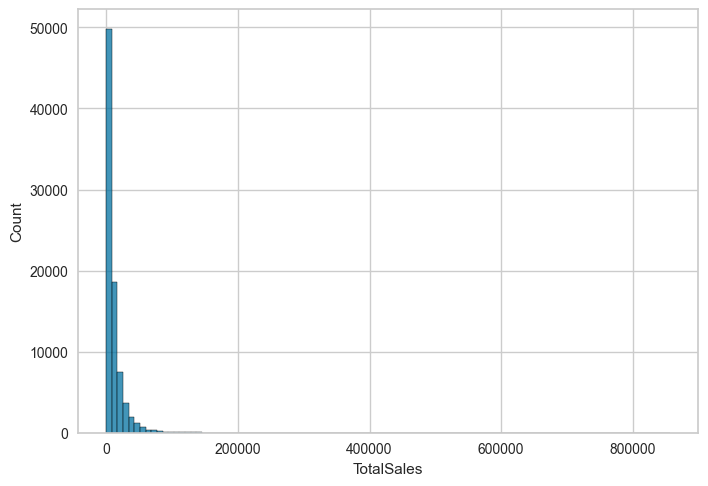

In [84]:
import seaborn as sb
#visualize the distribution of the total sales feature
sb.histplot(results['TotalSales'],bins=100)
#plt.xscale('log')

### Cohort table

In [85]:
cohort_info = data.groupby(["cohort date","cohort_index"])["CustomerID"].nunique().reset_index()

In [86]:
cohort_info.rename(columns = {"CustomerID": "Number of customers"}, inplace = True)

In [87]:
cohort_info

,cohort date,cohort_index,Number of customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


### Pivot table

In [88]:
# create a pivot table

cohort_table = cohort_info.pivot(index = "cohort date", columns = ["cohort_index"], values = "Number of customers")

#change index to understandable format
cohort_table.index = cohort_table.index.strftime('%B %Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January 2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February 2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March 2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April 2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May 2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June 2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

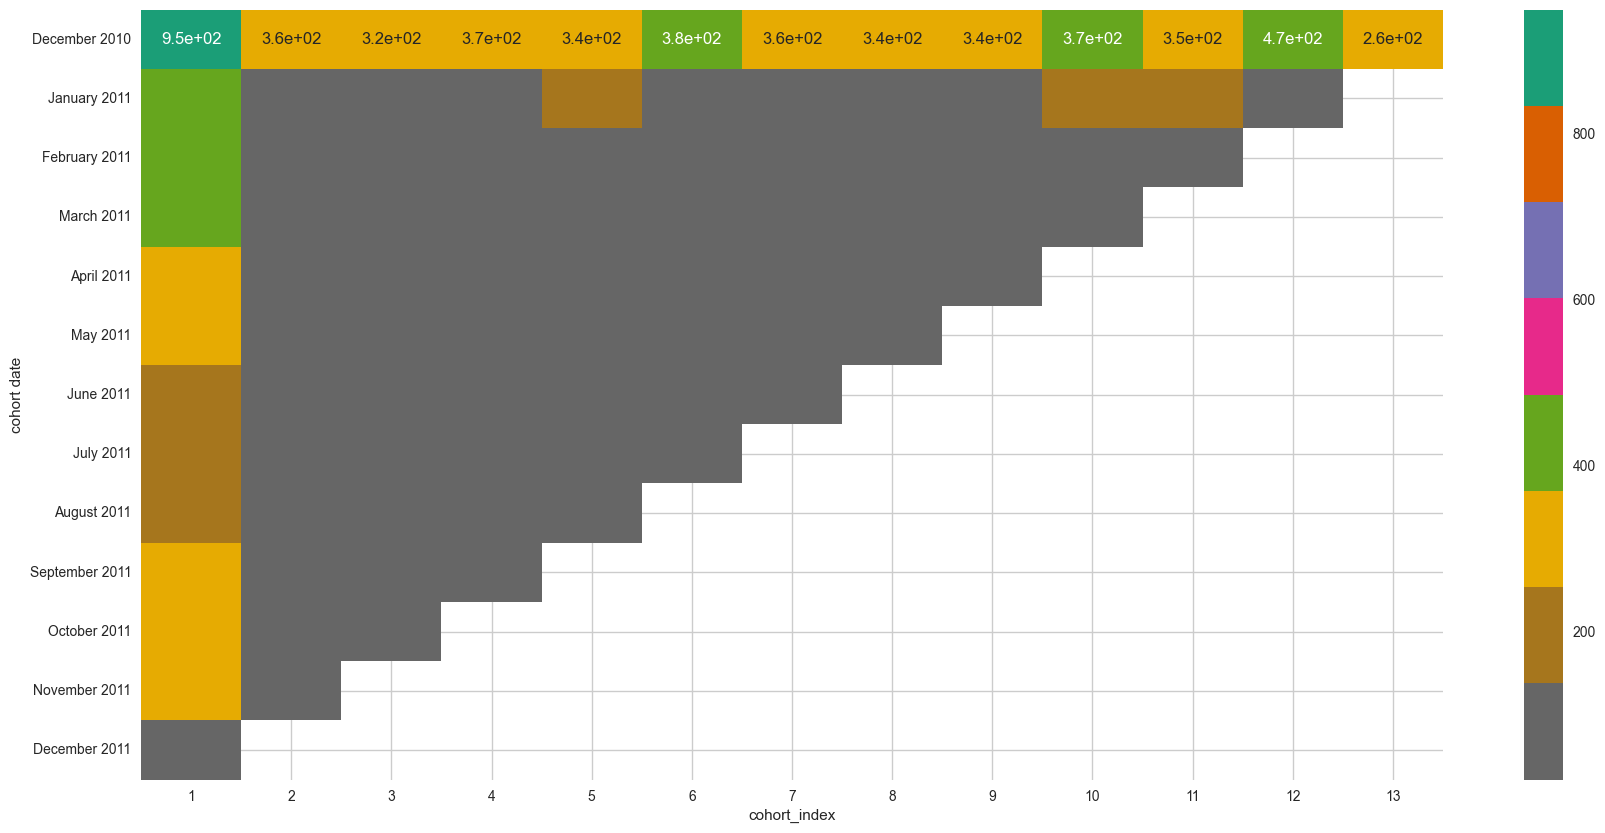

In [89]:
#visualize our results in heatmap

plt.figure(figsize = (21,10))
sns.heatmap(cohort_table, annot = True, cmap = 'Dark2_r')

**Observe retention rate**

To effeciently observe the customers rentention rate, lets plot the chart in percentage.

In [90]:
# showing retention rate in percentage
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis = 0)
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Draw heatmap**

<Axes: xlabel='cohort_index', ylabel='cohort date'>

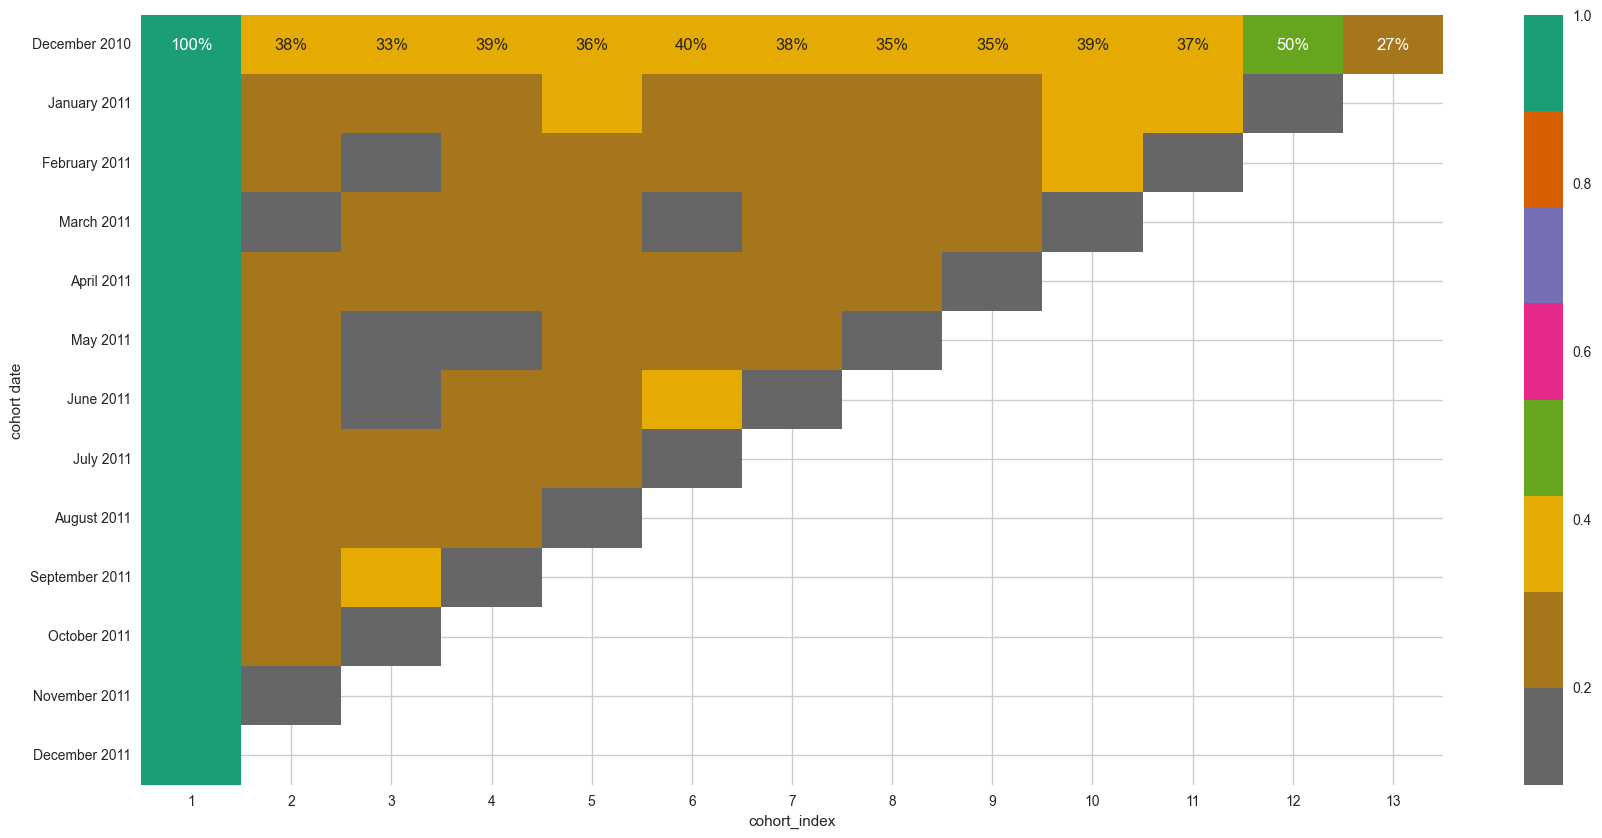

In [91]:
#visualize our results in heatmap

plt.figure(figsize = (21,10))
sns.heatmap(new_cohort_table, annot = True, cmap = 'Dark2_r', fmt = '.0%')

The heatmap above illustrates the customer retention rates for each cohort.

**OBSERVATIONS**

A healthy retention rate for e-commerce platforms is typically considered to be in the range of **20% to 40%.** This means that **20% to 40%** of your customers continue to make purchases from your e-commerce platform after their initial purchase.

- **December 2010 Cohort Outperforms Others:** The fact that the **December 2010** cohort has a retention rate above **30%** is a positive sign. It suggests that this group of customers has remained engaged with your e-commerce platform over time. This could be due to various factors, such as the quality of your products/services, effective marketing, or a strong customer retention strategy.

- **Decline in December 2011:** The observation that all cohorts have low retention rates in December 2011 suggests that there may have been specific challenges or issues affecting customer retention during that time. It's important to investigate what might have caused this decline and whether it's a one-time event or a recurring pattern

- **Variability in Retention Rates:** The range of retention rates, from a **minimum of 8% to a maximum of 50%**, suggests that there is significant variability in how different cohorts of customers are behaving. While 8% is relatively low, 50% is relatively high, considering the standard e-commerce retention rates mentioned earlier.

In addtion to observing the behaviour of each cohort, we can create a table which shows the average quantity of product bought by each cohort and how it fluctuates.

**Average quantity bought**

In [92]:
average_quantity = data.groupby(["cohort date", "cohort_index"])["Quantity"].mean().reset_index()
average_quantity["Quantity"] = average_quantity["Quantity"].round(1)

In [93]:
average_quantity.rename(columns = {"Quantity": "average quantity"}, inplace = True)

In [94]:
average_quantity

,cohort date,cohort_index,average quantity
0,2010-12-01,1,50.3
1,2010-12-01,2,50.3
2,2010-12-01,3,50.4
3,2010-12-01,4,50.6
4,2010-12-01,5,50.6
...,...,...,...
86,2011-10-01,2,49.9
87,2011-10-01,3,49.4
88,2011-11-01,1,51.1
89,2011-11-01,2,48.6


In [95]:
# create a pivot table

quantity_table = average_quantity.pivot(index = "cohort date", columns = ["cohort_index"], values = "average quantity")

#change index to understandable format
quantity_table.index = quantity_table.index.strftime('%B %Y')
quantity_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort date,,,,,,,,,,,,,
December 2010,50.3,50.3,50.4,50.6,50.6,50.4,50.5,50.5,50.2,50.6,50.5,50.6,50.7
January 2011,50.7,50.6,50.8,50.6,50.9,50.4,50.3,50.4,50.5,49.9,50.6,50.5,NaN
February 2011,51.2,49.7,51.0,50.3,50.2,50.7,49.2,50.7,50.9,49.6,50.1,NaN,NaN
March 2011,50.5,50.2,50.2,50.2,50.1,50.6,50.0,51.1,50.1,50.4,NaN,NaN,NaN
April 2011,50.7,49.9,50.0,50.1,50.6,50.3,50.3,49.9,51.1,NaN,NaN,NaN,NaN
May 2011,50.7,49.4,50.2,49.7,51.2,50.5,49.9,51.4,NaN,NaN,NaN,NaN,NaN
June 2011,50.6,51.0,48.5,50.6,51.4,50.9,50.3,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.7,49.5,50.8,50.1,49.8,50.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.5,49.8,50.4,51.0,50.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='cohort_index', ylabel='cohort date'>

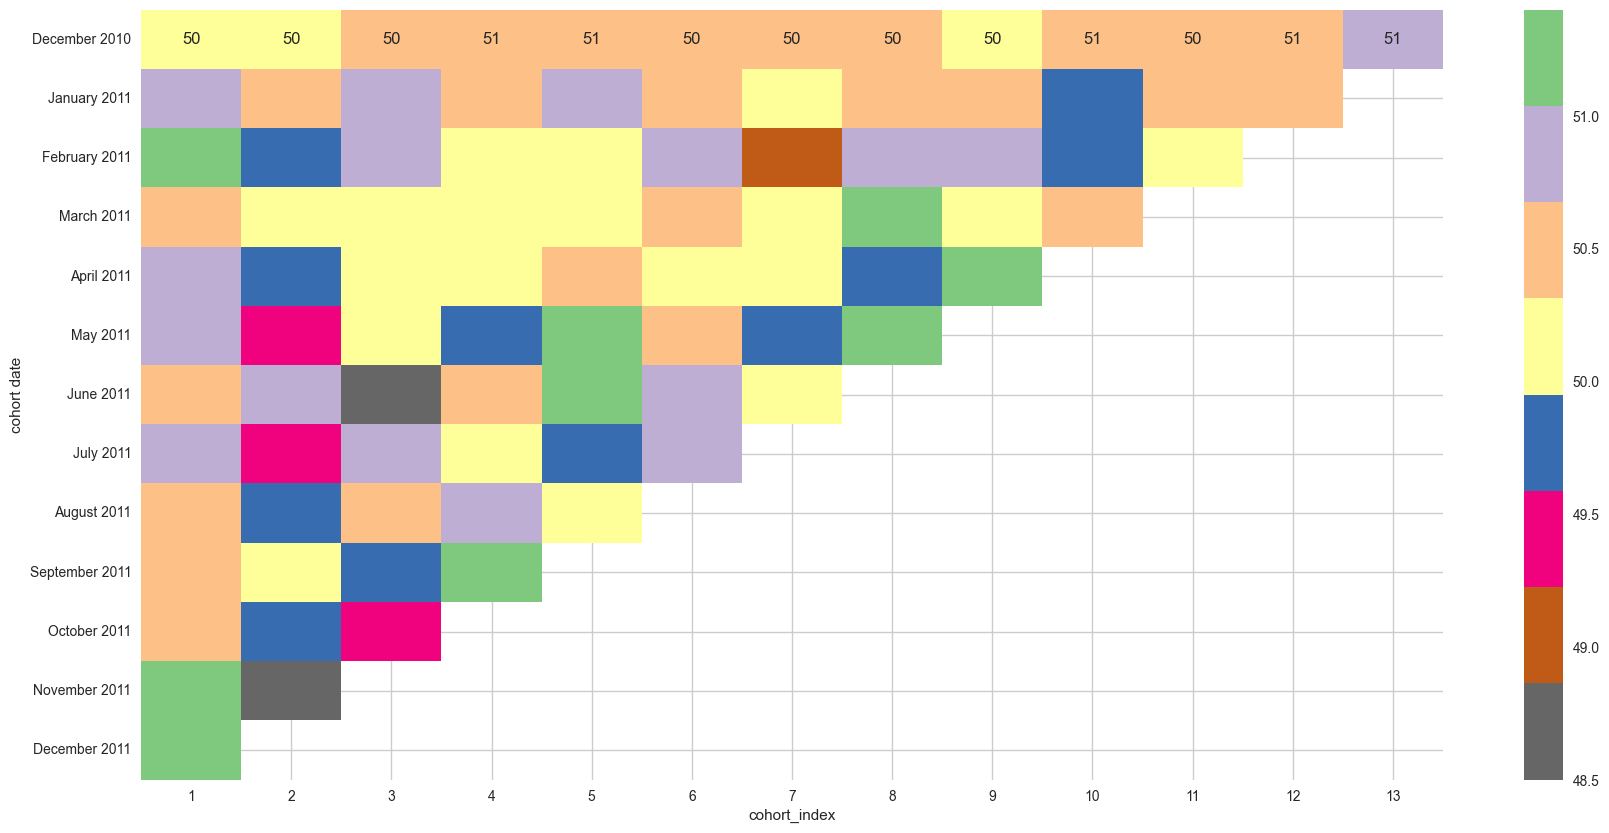

In [96]:
#visualize our results in heatmap

plt.figure(figsize = (21,10))
sns.heatmap(quantity_table, annot = True, cmap = 'Accent_r')

**Observations**

Although there is significant drop in customer retention after their first month as observed on the previous chart, the average quantity bought is not experiencing much fluctuations. Meaning there is possibiity that a few customers tends to puchase alot of product, therefore maintaining the average value

In [97]:
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

scaler = MinMaxScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(results),index=results.index,columns=results.columns)
print(x_scaled.describe())
print(x_scaled.head())

         TotalSales    OrderCount  AvgOrderValue
count  84912.000000  84912.000000   84912.000000
mean       0.014267      0.011737       0.255576
std        0.029919      0.030493       0.155533
min        0.000000      0.000000       0.000000
25%        0.003228      0.000000       0.149668
50%        0.007878      0.006192       0.239271
75%        0.016411      0.012384       0.330730
max        1.000000      1.000000       1.000000
                    TotalSales  OrderCount  AvgOrderValue
Country CustomerID                                       
Algeria 12347.0       0.010872    0.006192       0.310608
        12348.0       0.011315    0.000000       0.970189
        12349.0       0.003556    0.006192       0.101537
        12350.0       0.001665    0.000000       0.142724
        12352.0       0.007664    0.003096       0.328475


/var/folders/bv/_88d1hwx037799pwfgpxj4040000gn/T/ipykernel_16795/1790505954.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x,y,z,marker="o",cmap=cmap)


Text(0.5, 0.92, '3d visualization of our data')

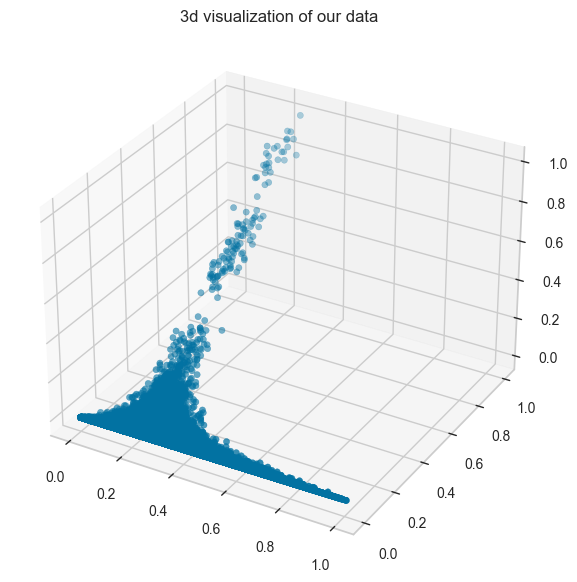

In [98]:
#plotting new data points
y=x_scaled['TotalSales']
x=x_scaled['AvgOrderValue']
z=x_scaled['OrderCount']
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,marker="o",cmap=cmap)
ax.set_title("3d visualization of our data")

/Users/mandeebot/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mandeebot/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mandeebot/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mandeebot/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10))

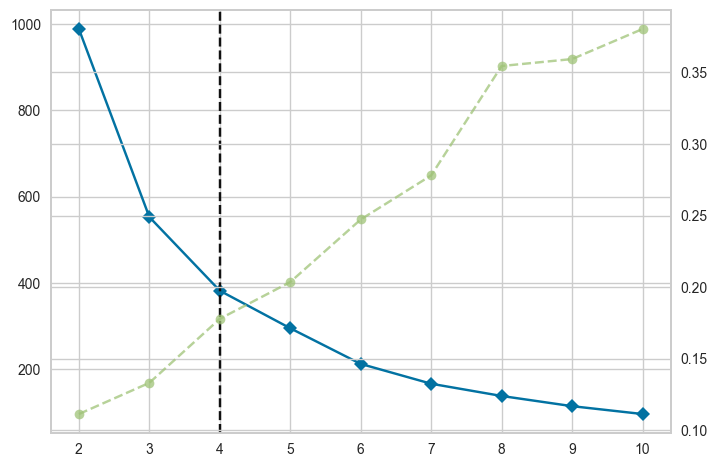

In [99]:
#importing clustering algo, silheoute score & kelbow visualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

#using the k elbow method to figure the appropriate number of clusters
elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(x_scaled)

/Users/mandeebot/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


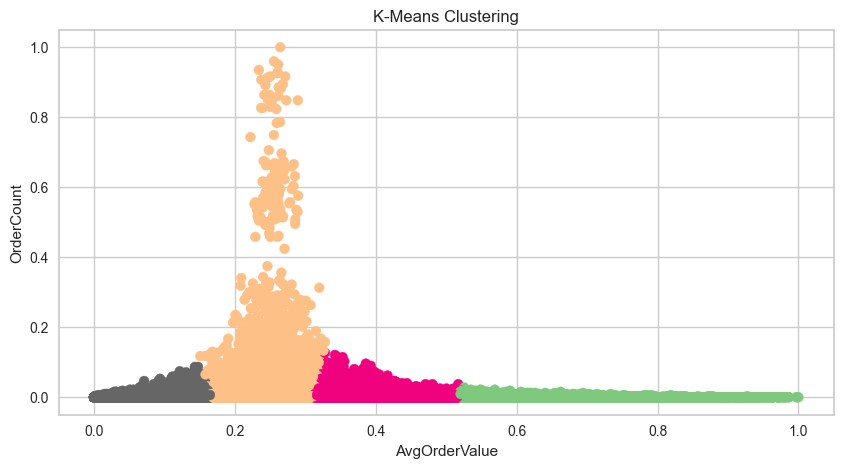

Silhouette Score: 0.9342


In [100]:
#applying kmeans clustering algorith
# K-means clustering
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters)
cluster.fit(x_scaled)

# Add cluster labels to the data
x_scaled["Cluster"] = cluster.labels_

# Visualize the clusters
plt.figure(figsize=(10, 5))
plt.scatter(
    x_scaled["AvgOrderValue"],
    x_scaled["OrderCount"],
    c=x_scaled["Cluster"],
    s=50,
    cmap='Accent',
)
plt.title("K-Means Clustering")
plt.xlabel("AvgOrderValue")
plt.ylabel("OrderCount")
plt.legend()
plt.show()

# Calculate the silhouette score
silhouette_score = silhouette_score(x_scaled,
    x_scaled["Cluster"], metric="euclidean")
print(f"Silhouette Score: {silhouette_score:.4f}")

**observations**
>
- Customers in the 4th cluster have a high value for OrderCount, but their AvgOrderValue is low. Basically, these customers make frequent purchases of low-value items. The business can make recommendations of low-value items to this segment, in order to get a high engagement rate.

The customers in the 1st cluster have low numbers of orders and total revenue, but their average per-order value is high. So these customers buy expensive items infrequently. It would be great to recommend expensive products to this segment group.


Text(0.5, 1.0, 'distribution of the new clusters')

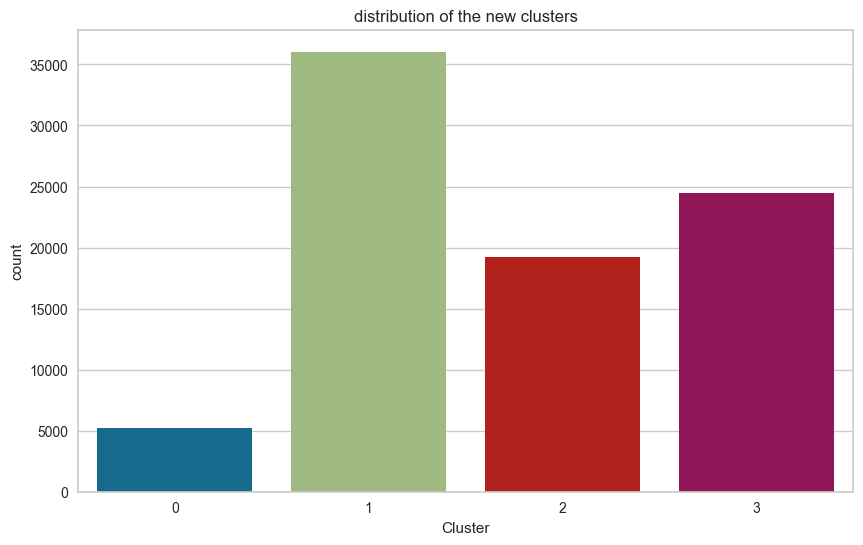

In [101]:
#distribution of cluster
plt.figure(figsize=(10,6))
sb.countplot(x = x_scaled.Cluster)
plt.title("distribution of the new clusters")


**observation**
>
- the 4th cluster, (cluster 3) has the lowest numbers for all three attributes - Total Sales, Order Count, and Average Order Value. It means that the 4th cluster contains customers with the lowest amount of sales, orders, and lowest average per-order value.
- First cluster, cluster (0) has the highest numbers for total sales and order count attributes. The customers in this cluster purchase expensive items and give the business the highest revenue. The company should focus on this cluster, as it will result in the highest ROI.


Text(0.5, 1.0, 'distribution of the new clusters')

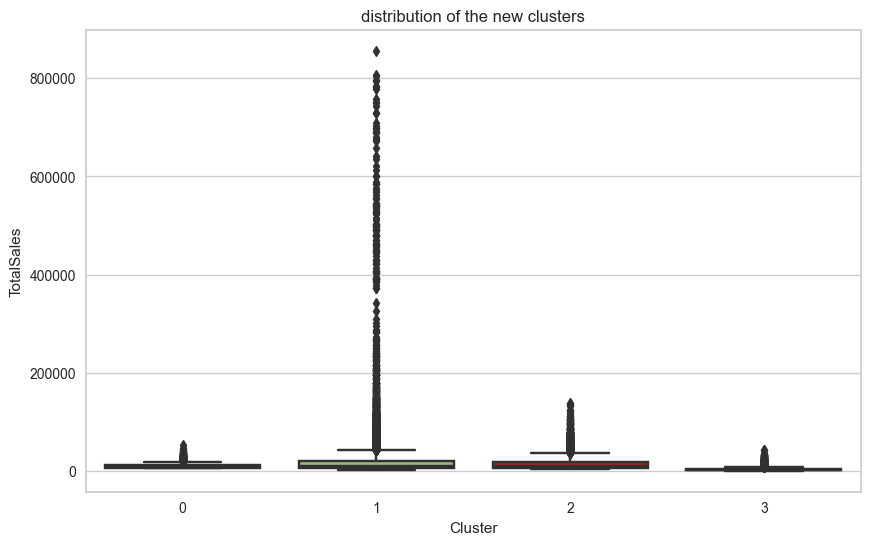

In [102]:
#distribution of cluster
plt.figure(figsize=(10,6))
sb.boxplot(x = x_scaled.Cluster,y="TotalSales",data=results)
plt.title("distribution of the new clusters")


Text(0.5, 1.0, 'distribution of the new clusters')

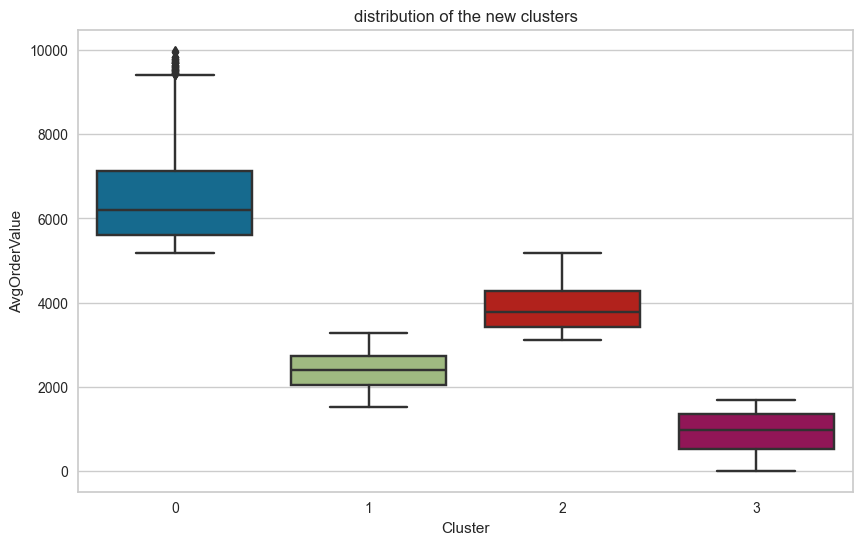

In [103]:
#distribution of cluster
plt.figure(figsize=(10,6))
sb.boxplot(x = x_scaled.Cluster,y="AvgOrderValue",data=results)
plt.title("distribution of the new clusters")

**RECOMMENDATIONS**

- **Identify Factors Driving High Retention (December 2010):** Analyze what factors have contributed to the high retention rate for the December 2010 cohort. Was there a specific marketing campaign, product improvement, or customer engagement strategy that worked well for this group? Try to replicate successful strategies for other cohorts.

- **Investigate December 2011 Drop:** Investigate why all cohorts have low retention rates on December 2011. It might involve analyzing customer feedback, product quality, customer service, or any changes in your business operations during that time. Identifying and addressing the root causes of this drop is crucial for improving future retention rates.

- **Set Realistic Targets:** While the standard e-commerce retention rate range is 20% to 40%, it's essential to set targets that are specific to your business and its circumstances. Aim to improve retention rates gradually over time based on your historical data and industry benchmarks.

- **Implement Retention Strategies:** Develop and implement retention strategies that are tailored to different cohorts of customers. Personalized marketing, loyalty programs, and targeted communication can help improve retention rates.

- **Continuously Monitor and Adapt:** Retention rates can change over time due to various factors, so it's crucial to continuously monitor them and adapt your strategies accordingly. Regularly analyzing cohort data and customer behavior will help you make informed decisions to improve retention.
- Now the company knows its customer segments, how customers in those segments behave, and what they are interested in. This information can help target the company audience better and, therefore, increase sales and ROI
>
This can serve as a signal to carryout targetted marketing in countries where more quantites are sold in contrast to targeting countries where more customers are acquired.